<a href="https://colab.research.google.com/github/elvoza/Curso-Introductorio-a-Python/blob/main/Sesi%C3%B3n_10_y_11_reto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Empecemos creando nuestra base de datos usando Yahoo Finance

1. descarga 6 activos difrentes con los valores del ultimo año (entre ellos elige una criptomoneda y el dolar en pesos (COP=X), con una periodicidad díaria, y elije el valor del cierre (Close) y el volumen (Volume) de los movimientos, verifica los datos y limpia si es necesario con la estrategia de valores vecinos.

2. Crea una nueva variable categorica llamada "catvolume#NombreActivo", en función de uno de los activos y sus valores de volumen de venta, en donde dividas por cuartiles y le des los valores de "bajo" al primer cuartil. "medio" al segundo cuartil, "alto" al tercero y "muy_alto" al cuarto

3. Crea una columna adicional que se llame index y ponla en la primera columna de datos

4. Crea una columna de la criptomoneda en valores pesos multiplicandola por el valor del dolar en cada día.

5. Crea un resumen estadistico de las variables y analizar

6. Realice un analisis gráfico de las variables que incluya: (Series de tiempo, Histograma,  diagrama de cajas y bigotes y diagrama circular (Variable categorica)

7. Realice una matriz de correlación para las variables originales

8. Ajuste una media movil para una de los activos como estrategia predictora y calcule las estadisticas del error

9. Realice una matriz de gráficos donde se visualicen los diagramas de dispersión entre los valores "Close" de las Variables

10. Realice una regresión lineal de la criptomoneda en función de otro de los activos y calcule el ajuste del modelo.

1. descarga 6 activos difrentes con los valores del ultimo año (entre ellos elige una criptomoneda y el dolar en pesos (COP=X), con una periodicidad díaria, y elije el valor del cierre (Close) y el volumen (Volume) de los movimientos, verifica los datos y limpia si es necesario con la estrategia de valores vecinos.


In [332]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [241]:

ticker="J", "UUUU", "F", "K","BNSOL-USD", "COP=X"
data=yf.download(tickers=tickers,period="1y", interval="1d",
                 auto_adjust=True, prepost=True)[["Close", "Volume"]].fillna(method='bfill').dropna()
data.head()

[*********************100%***********************]  6 of 6 completed
/tmp/ipython-input-2607477665.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  auto_adjust=True, prepost=True)[["Close", "Volume"]].fillna(method='bfill').dropna()


Price            Close                                                      \
Ticker       BNSOL-USD        COP=X         F           J          K  UUUU   
Date                                                                         
2024-12-05  243.176773  4425.750000  9.784953  135.164902  78.502579  6.69   
2024-12-06  243.176773  4413.669922  9.784953  135.164902  78.502579  6.69   
2024-12-07  243.176773  4376.152344  9.868745  133.517395  78.347015  6.37   
2024-12-08  241.922241  4376.152344  9.868745  133.517395  78.347015  6.37   
2024-12-09  221.404266  4376.152344  9.868745  133.517395  78.347015  6.37   

Price          Volume                                                    
Ticker      BNSOL-USD COP=X           F         J          K       UUUU  
Date                                                                     
2024-12-05  7795204.0   0.0  56227000.0  675286.0  1187400.0  3526700.0  
2024-12-06  7795204.0   0.0  56227000.0  675286.0  1187400.0  3526700.0  
2024-12-07  7795204.0   0.0  53230100.0  881831.0  1409600.0  4140500.0  
2024-12-08  7546239.0   0.0  53230100.0  881831.0  1409600.0  4140500.0  
2024-12-09  9950477.0   0.0  53230100.0  881831.0  1409600.0  4140500.0

In [242]:
len(data)

366

In [243]:
data.isnull().sum()

Price   Ticker   
Close   BNSOL-USD    0
        COP=X        0
        F            0
        J            0
        K            0
        UUUU         0
Volume  BNSOL-USD    0
        COP=X        0
        F            0
        J            0
        K            0
        UUUU         0
dtype: int64

2. Crea una nueva variable categorica llamada "catvolume#NombreActivo", en función de uno de los activos y sus valores de volumen de venta, en donde dividas por cuartiles y le des los valores de "bajo" al primer cuartil. "medio" al segundo cuartil, "alto" al tercero y "muy_alto" al cuarto

In [244]:
volume_ford = data['Volume']['F']
volume_ford

levels = ['bajo', 'medio', 'alto', 'muy_alto']
data['Volume', 'catvolumeford'] = pd.qcut(volume_ford, q=4, labels=levels, duplicates='drop')
data

Price            Close                                                        \
Ticker       BNSOL-USD        COP=X          F           J          K   UUUU   
Date                                                                           
2024-12-05  243.176773  4425.750000   9.784953  135.164902  78.502579   6.69   
2024-12-06  243.176773  4413.669922   9.784953  135.164902  78.502579   6.69   
2024-12-07  243.176773  4376.152344   9.868745  133.517395  78.347015   6.37   
2024-12-08  241.922241  4376.152344   9.868745  133.517395  78.347015   6.37   
2024-12-09  221.404266  4376.152344   9.868745  133.517395  78.347015   6.37   
...                ...          ...        ...         ...        ...    ...   
2025-12-01  137.336090  3691.856689  13.160000  132.519989  83.070000  14.07   
2025-12-02  150.479767  3808.399902  12.960000  135.020004  83.129997  15.05   
2025-12-03  157.125519  3816.250000  13.090000  138.729996  83.139999  15.10   
2025-12-04  150.900391  3768.149902  13.140000  140.729996  83.150002  16.32   
2025-12-05  144.877258  3795.239990  13.030000  140.220001  83.139999  15.61   

Price          Volume                                                      \
Ticker      BNSOL-USD COP=X           F          J          K        UUUU   
Date                                                                        
2024-12-05  7795204.0   0.0  56227000.0   675286.0  1187400.0   3526700.0   
2024-12-06  7795204.0   0.0  56227000.0   675286.0  1187400.0   3526700.0   
2024-12-07  7795204.0   0.0  53230100.0   881831.0  1409600.0   4140500.0   
2024-12-08  7546239.0   0.0  53230100.0   881831.0  1409600.0   4140500.0   
2024-12-09  9950477.0   0.0  53230100.0   881831.0  1409600.0   4140500.0   
...               ...   ...         ...        ...        ...         ...   
2025-12-01  4083806.0   0.0  51594000.0  1547600.0  3205800.0   7793700.0   
2025-12-02  4286177.0   0.0  57641700.0   969700.0  3005900.0   7872700.0   
2025-12-03  3760903.0   0.0  45364700.0   980100.0  1650000.0   8370700.0   
2025-12-04  4455764.0   0.0  47554800.0  1483600.0  2665400.0  15500500.0   
2025-12-05  2598367.0   0.0  54079800.0  1692600.0  4922500.0  11597500.0   

Price                     
Ticker     catvolumeford  
Date                      
2024-12-05          bajo  
2024-12-06          bajo  
2024-12-07          bajo  
2024-12-08          bajo  
2024-12-09          bajo  
...                  ...  
2025-12-01          bajo  
2025-12-02          bajo  
2025-12-03          bajo  
2025-12-04          bajo  
2025-12-05          bajo  

[366 rows x 13 columns]

In [245]:
print(data['Volume', 'catvolumeford'].value_counts())

(Volume, catvolumeford)
medio       93
bajo        92
muy_alto    92
alto        89
Name: count, dtype: int64


3. Crea una columna adicional que se llame index y ponla en la primera columna de datos

In [246]:
Index = range(1, len(data) + 1)
print(Index)


range(1, 367)


In [247]:
data.insert(0, 'Index', Index)

In [248]:
data

Price      Index       Close                                                 \
Ticker             BNSOL-USD        COP=X          F           J          K   
Date                                                                          
2024-12-05     1  243.176773  4425.750000   9.784953  135.164902  78.502579   
2024-12-06     2  243.176773  4413.669922   9.784953  135.164902  78.502579   
2024-12-07     3  243.176773  4376.152344   9.868745  133.517395  78.347015   
2024-12-08     4  241.922241  4376.152344   9.868745  133.517395  78.347015   
2024-12-09     5  221.404266  4376.152344   9.868745  133.517395  78.347015   
...          ...         ...          ...        ...         ...        ...   
2025-12-01   362  137.336090  3691.856689  13.160000  132.519989  83.070000   
2025-12-02   363  150.479767  3808.399902  12.960000  135.020004  83.129997   
2025-12-03   364  157.125519  3816.250000  13.090000  138.729996  83.139999   
2025-12-04   365  150.900391  3768.149902  13.140000  140.729996  83.150002   
2025-12-05   366  144.877258  3795.239990  13.030000  140.220001  83.139999   

Price                 Volume                                          \
Ticker       UUUU  BNSOL-USD COP=X           F          J          K   
Date                                                                   
2024-12-05   6.69  7795204.0   0.0  56227000.0   675286.0  1187400.0   
2024-12-06   6.69  7795204.0   0.0  56227000.0   675286.0  1187400.0   
2024-12-07   6.37  7795204.0   0.0  53230100.0   881831.0  1409600.0   
2024-12-08   6.37  7546239.0   0.0  53230100.0   881831.0  1409600.0   
2024-12-09   6.37  9950477.0   0.0  53230100.0   881831.0  1409600.0   
...           ...        ...   ...         ...        ...        ...   
2025-12-01  14.07  4083806.0   0.0  51594000.0  1547600.0  3205800.0   
2025-12-02  15.05  4286177.0   0.0  57641700.0   969700.0  3005900.0   
2025-12-03  15.10  3760903.0   0.0  45364700.0   980100.0  1650000.0   
2025-12-04  16.32  4455764.0   0.0  47554800.0  1483600.0  2665400.0   
2025-12-05  15.61  2598367.0   0.0  54079800.0  1692600.0  4922500.0   

Price                                 
Ticker            UUUU catvolumeford  
Date                                  
2024-12-05   3526700.0          bajo  
2024-12-06   3526700.0          bajo  
2024-12-07   4140500.0          bajo  
2024-12-08   4140500.0          bajo  
2024-12-09   4140500.0          bajo  
...                ...           ...  
2025-12-01   7793700.0          bajo  
2025-12-02   7872700.0          bajo  
2025-12-03   8370700.0          bajo  
2025-12-04  15500500.0          bajo  
2025-12-05  11597500.0          bajo  

[366 rows x 14 columns]

4. Crea una columna de la criptomoneda en valores pesos multiplicandola por el valor del dolar en cada día.

In [249]:
COP_BINANCE_USD= data['Close', 'BNSOL-USD'] * data['Close', 'COP=X']
data.insert(14,"BNSOL-COP",COP_BINANCE_USD)

In [250]:
data

Price      Index       Close                                                 \
Ticker             BNSOL-USD        COP=X          F           J          K   
Date                                                                          
2024-12-05     1  243.176773  4425.750000   9.784953  135.164902  78.502579   
2024-12-06     2  243.176773  4413.669922   9.784953  135.164902  78.502579   
2024-12-07     3  243.176773  4376.152344   9.868745  133.517395  78.347015   
2024-12-08     4  241.922241  4376.152344   9.868745  133.517395  78.347015   
2024-12-09     5  221.404266  4376.152344   9.868745  133.517395  78.347015   
...          ...         ...          ...        ...         ...        ...   
2025-12-01   362  137.336090  3691.856689  13.160000  132.519989  83.070000   
2025-12-02   363  150.479767  3808.399902  12.960000  135.020004  83.129997   
2025-12-03   364  157.125519  3816.250000  13.090000  138.729996  83.139999   
2025-12-04   365  150.900391  3768.149902  13.140000  140.729996  83.150002   
2025-12-05   366  144.877258  3795.239990  13.030000  140.220001  83.139999   

Price                 Volume                                          \
Ticker       UUUU  BNSOL-USD COP=X           F          J          K   
Date                                                                   
2024-12-05   6.69  7795204.0   0.0  56227000.0   675286.0  1187400.0   
2024-12-06   6.69  7795204.0   0.0  56227000.0   675286.0  1187400.0   
2024-12-07   6.37  7795204.0   0.0  53230100.0   881831.0  1409600.0   
2024-12-08   6.37  7546239.0   0.0  53230100.0   881831.0  1409600.0   
2024-12-09   6.37  9950477.0   0.0  53230100.0   881831.0  1409600.0   
...           ...        ...   ...         ...        ...        ...   
2025-12-01  14.07  4083806.0   0.0  51594000.0  1547600.0  3205800.0   
2025-12-02  15.05  4286177.0   0.0  57641700.0   969700.0  3005900.0   
2025-12-03  15.10  3760903.0   0.0  45364700.0   980100.0  1650000.0   
2025-12-04  16.32  4455764.0   0.0  47554800.0  1483600.0  2665400.0   
2025-12-05  15.61  2598367.0   0.0  54079800.0  1692600.0  4922500.0   

Price                                    BNSOL-COP  
Ticker            UUUU catvolumeford                
Date                                                
2024-12-05   3526700.0          bajo  1.076240e+06  
2024-12-06   3526700.0          bajo  1.073302e+06  
2024-12-07   4140500.0          bajo  1.064179e+06  
2024-12-08   4140500.0          bajo  1.058689e+06  
2024-12-09   4140500.0          bajo  9.688988e+05  
...                ...           ...           ...  
2025-12-01   7793700.0          bajo  5.070252e+05  
2025-12-02   7872700.0          bajo  5.730871e+05  
2025-12-03   8370700.0          bajo  5.996303e+05  
2025-12-04  15500500.0          bajo  5.686153e+05  
2025-12-05  11597500.0          bajo  5.498440e+05  

[366 rows x 15 columns]

5. Crea un resumen estadistico de las variables y analizar

In [251]:
data.describe()

Price        Index       Close                                       \
Ticker               BNSOL-USD        COP=X           F           J   
count   366.000000  366.000000   366.000000  366.000000  366.000000   
mean    183.500000  185.078841  4082.014850   10.560096  134.831782   
std     105.799338   36.428342   178.563186    1.332093   12.299093   
min       1.000000  110.089813  3691.856689    8.354903  108.915596   
25%      92.250000  154.675594  3984.860107    9.375307  126.144636   
50%     183.500000  184.967552  4091.790283   10.291183  132.543327   
75%     274.750000  210.516605  4200.875000   11.546464  145.854076   
max     366.000000  268.510162  4425.750000   13.681768  164.043884   

Price                                 Volume                       \
Ticker           K        UUUU     BNSOL-USD  COP=X             F   
count   366.000000  366.000000  3.660000e+02  366.0  3.660000e+02   
mean     80.055650    8.680902  8.330979e+06    0.0  8.960099e+07   
std       1.573752    5.306694  1.952695e+07    0.0  5.181164e+07   
min      76.426323    3.440000  6.916160e+05    0.0  2.908310e+07   
25%      78.809685    4.870000  2.860285e+06    0.0  5.968830e+07   
50%      80.029076    5.745000  4.883502e+06    0.0  7.393940e+07   
75%      80.827423   11.845000  8.541807e+06    0.0  1.019374e+08   
max      83.150002   26.230000  3.155307e+08    0.0  4.798403e+08   

Price                                                BNSOL-COP  
Ticker             J             K          UUUU                
count   3.660000e+02  3.660000e+02  3.660000e+02  3.660000e+02  
mean    8.749264e+05  2.835270e+06  1.259776e+07  7.553458e+05  
std     4.756743e+05  1.669594e+06  9.410905e+06  1.518924e+05  
min     3.083530e+05  5.779000e+05  2.134800e+06  4.606038e+05  
25%     5.744000e+05  1.856000e+06  6.612200e+06  6.309085e+05  
50%     7.349500e+05  2.397200e+06  9.573500e+06  7.579009e+05  
75%     9.855570e+05  3.121100e+06  1.461980e+07  8.630337e+05  
max     3.783300e+06  1.145120e+07  6.065050e+07  1.153899e+06

6. Realice un analisis gráfico de las variables que incluya: (Series de tiempo, Histograma,  diagrama de cajas y bigotes y diagrama circular (Variable categorica)

In [259]:
corto= data['Close']
corto

Ticker,BNSOL-USD,COP=X,F,J,K,UUUU
Date,,,,,,
2024-12-05,243.176773,4425.750000,9.784953,135.164902,78.502579,6.69
2024-12-06,243.176773,4413.669922,9.784953,135.164902,78.502579,6.69
2024-12-07,243.176773,4376.152344,9.868745,133.517395,78.347015,6.37
2024-12-08,241.922241,4376.152344,9.868745,133.517395,78.347015,6.37
2024-12-09,221.404266,4376.152344,9.868745,133.517395,78.347015,6.37
...,...,...,...,...,...,...
2025-12-01,137.336090,3691.856689,13.160000,132.519989,83.070000,14.07
2025-12-02,150.479767,3808.399902,12.960000,135.020004,83.129997,15.05
2025-12-03,157.125519,3816.250000,13.090000,138.729996,83.139999,15.10


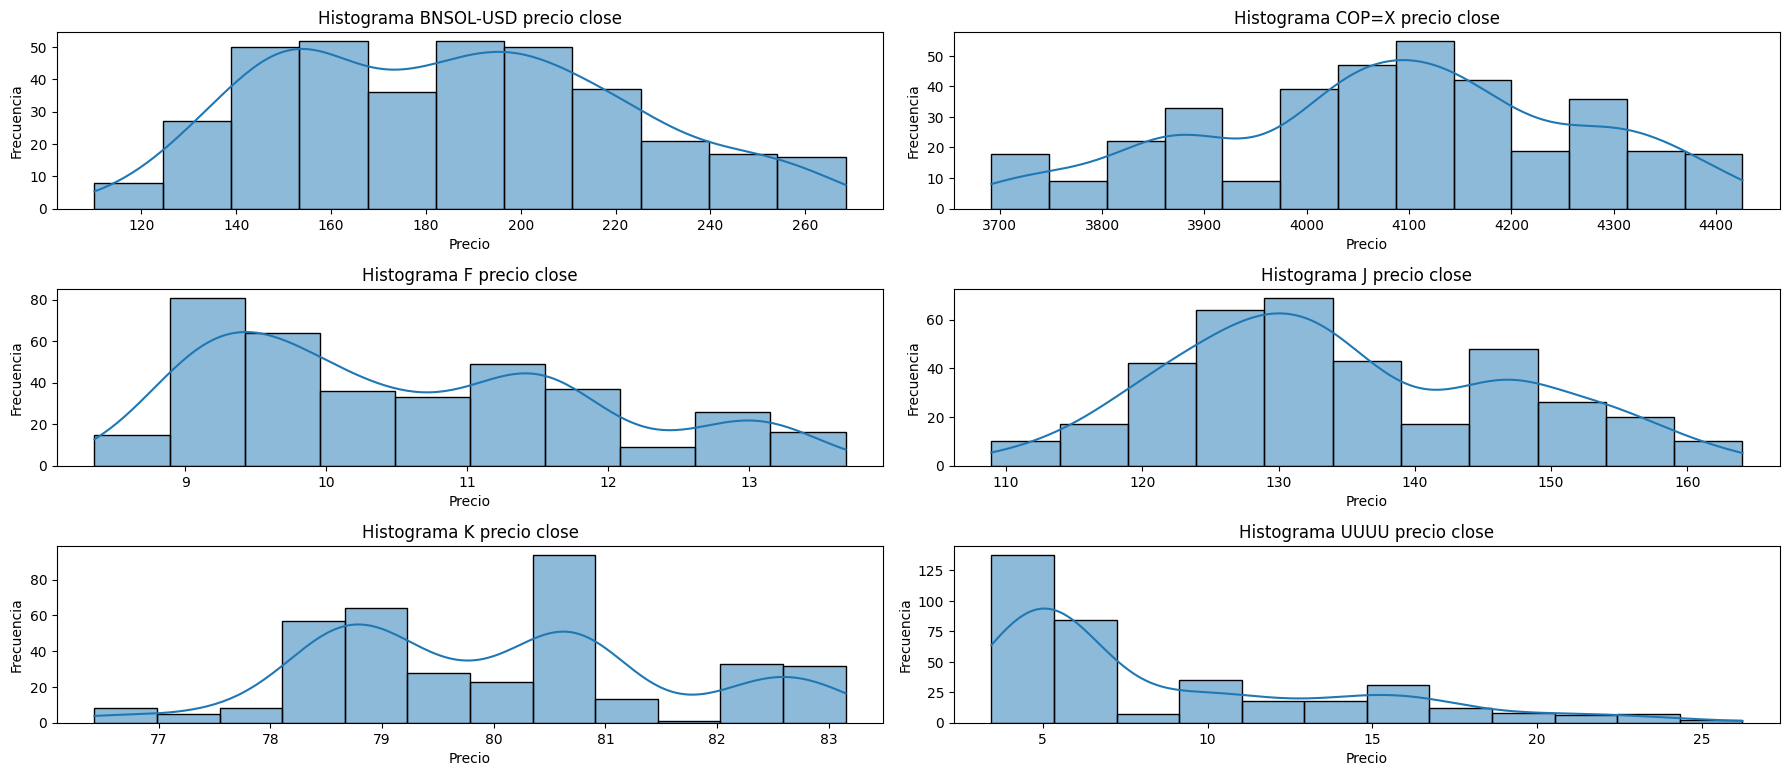

In [294]:
plt.figure(figsize=(18, 10))
for i, column in enumerate(corto.columns):
    plt.subplot(len(corto.columns) // 2 + 1, 2, i + 1)
    sns.histplot(corto[column], kde=True)
    plt.title(f'Histograma {column} precio close')
    plt.xlabel('Precio')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


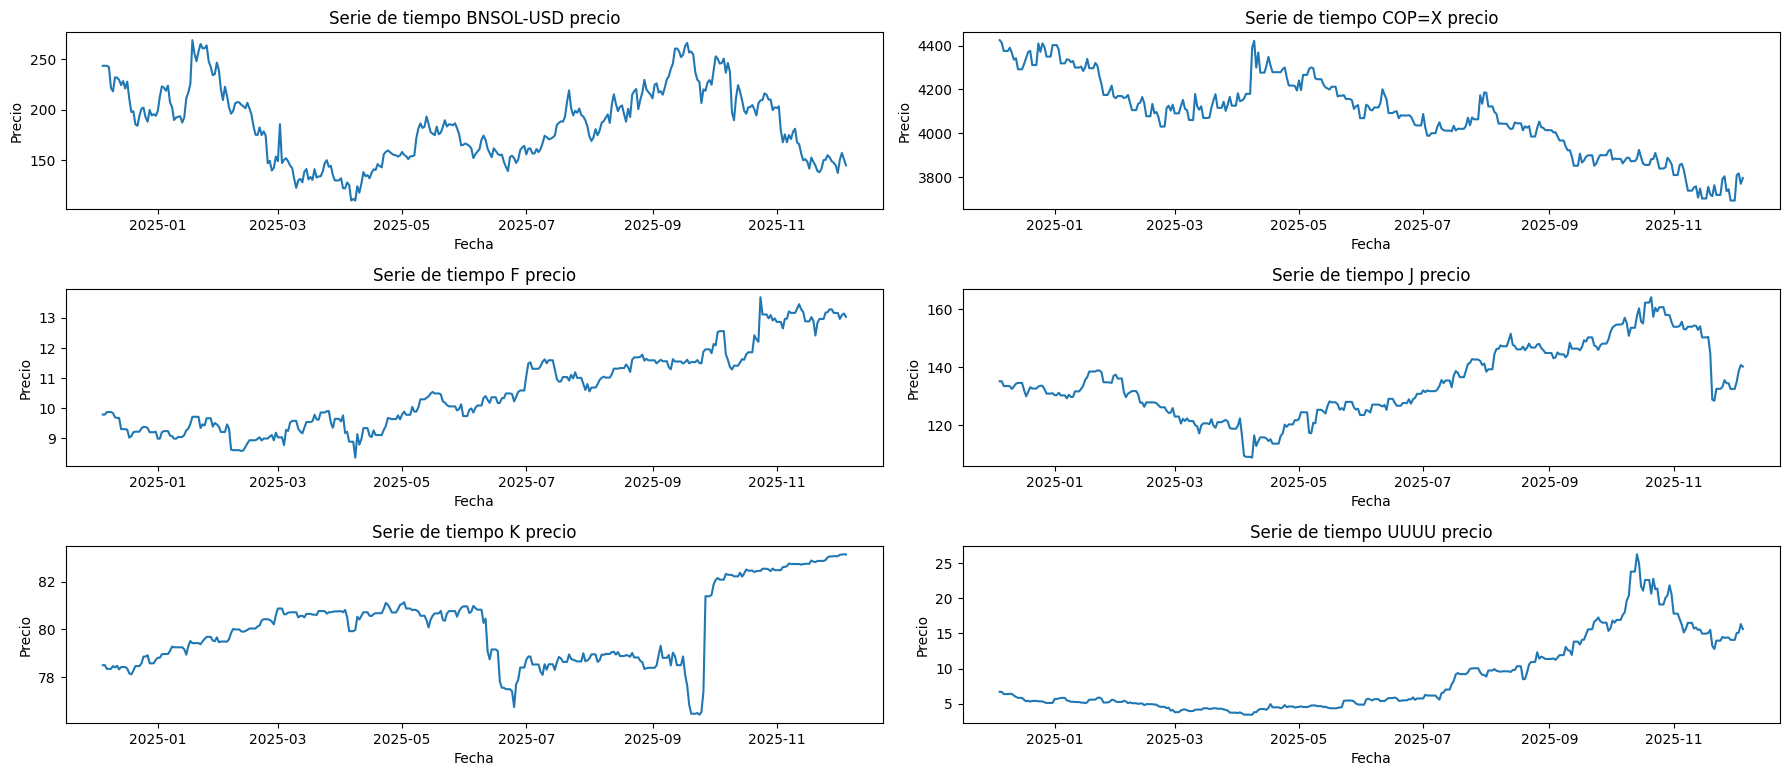

In [290]:
plt.figure(figsize=(18, 10))
for i, column in enumerate(corto.columns):
    plt.subplot(len(corto.columns) // 2 + 1, 2, i + 1)
    sns.lineplot(x=corto.index, y=corto[column])
    plt.title(f'Serie de tiempo {column} precio')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
plt.tight_layout()
plt.show()

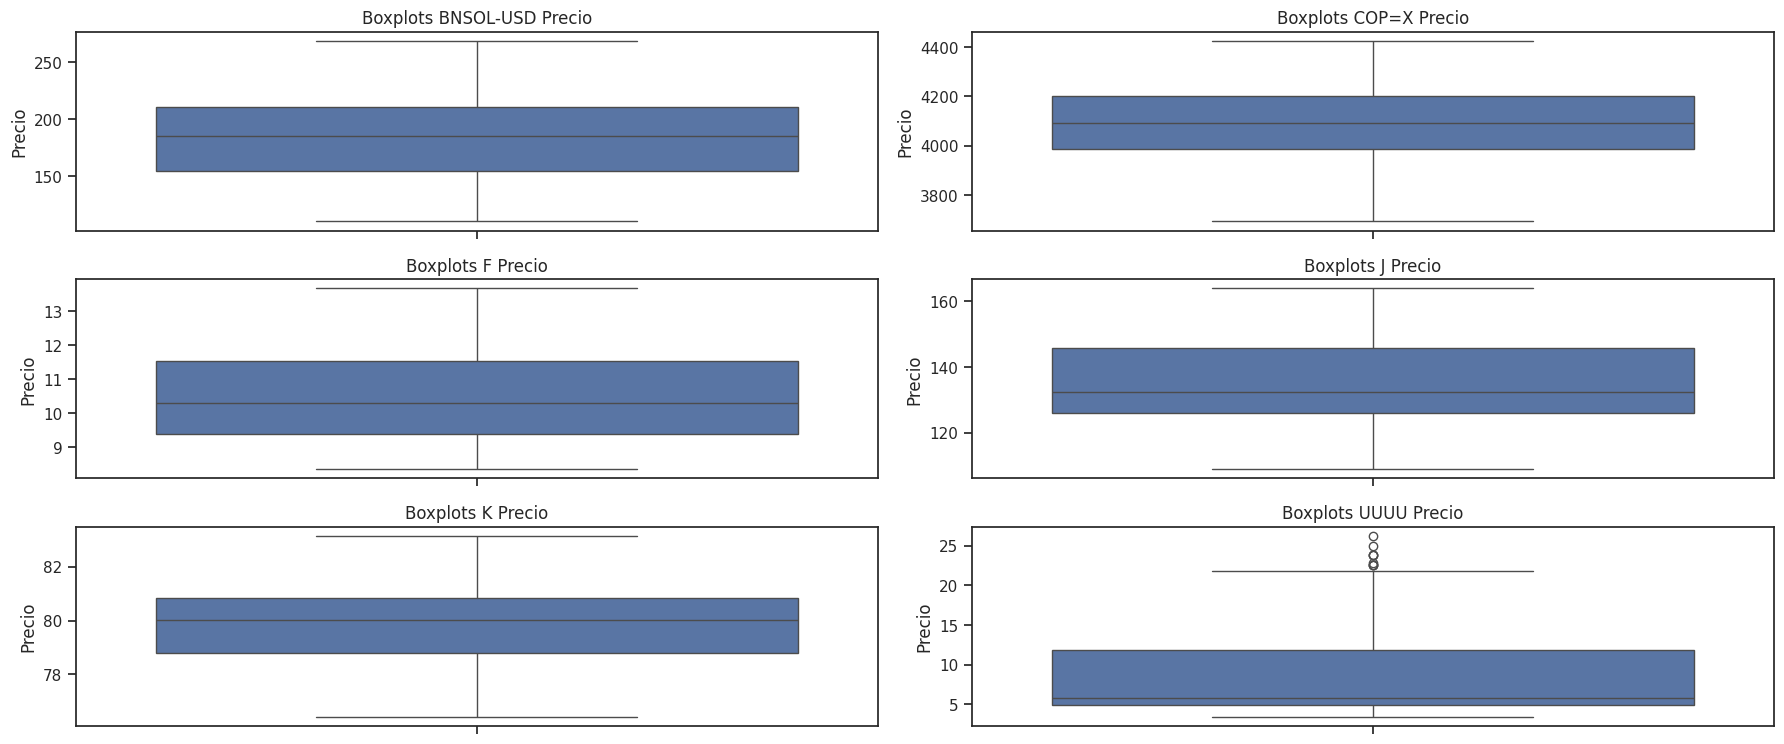

In [329]:
plt.figure(figsize=(18, 10))
for i, column in enumerate(corto.columns):
    plt.subplot(len(corto.columns) // 2 + 1, 2, i + 1)
    sns.boxplot(y=corto[column])
    plt.title(f'Boxplots {column} Precio')
    plt.ylabel('Precio')
plt.tight_layout()
plt.show()

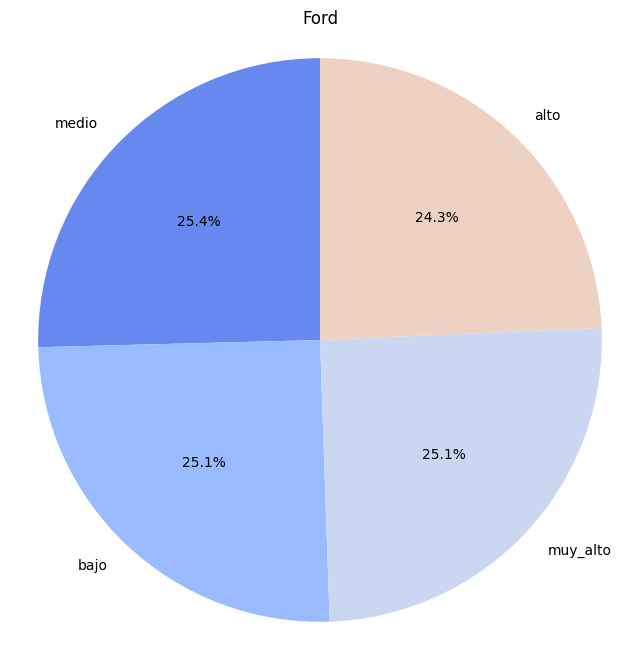

In [292]:
plt.figure(figsize=(8, 8))
volumen_categorias = data['Volume', 'catvolumeford'].value_counts()
plt.pie(volumen_categorias, labels=volumen_categorias.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm'))
plt.title('Ford')
plt.axis('equal')
plt.show()

7. Realice una matriz de correlación para las variables originales

In [306]:
corr = data.corr(method="kendall", numeric_only=True)

corr

Price                   Index     Close                                \
Ticker                        BNSOL-USD     COP=X         F         J   
Price     Ticker                                                        
Index                1.000000  0.041800 -0.726204  0.753747  0.429327   
Close     BNSOL-USD  0.041800  1.000000 -0.045481  0.148544  0.485076   
          COP=X     -0.726204 -0.045481  1.000000 -0.636896 -0.432036   
          F          0.753747  0.148544 -0.636896  1.000000  0.536570   
          J          0.429327  0.485076 -0.432036  0.536570  1.000000   
          K          0.285674 -0.230688 -0.198096  0.139346 -0.072575   
          UUUU       0.558366  0.380666 -0.497803  0.629529  0.750192   
Volume    BNSOL-USD -0.122617  0.309708  0.067518 -0.097439  0.149019   
          COP=X           NaN       NaN       NaN       NaN       NaN   
          F         -0.110801 -0.312772  0.106349 -0.201988 -0.314826   
          J          0.007076 -0.127884 -0.031553 -0.030546 -0.069192   
          K          0.066592 -0.124252 -0.029901  0.012696 -0.148903   
          UUUU       0.488149  0.068799 -0.460341  0.371985  0.303126   
BNSOL-COP           -0.070649  0.871222  0.083481  0.042732  0.373948   

Price                                      Volume                            \
Ticker                      K      UUUU BNSOL-USD COP=X         F         J   
Price     Ticker                                                              
Index                0.285674  0.558366 -0.122617   NaN -0.110801  0.007076   
Close     BNSOL-USD -0.230688  0.380666  0.309708   NaN -0.312772 -0.127884   
          COP=X     -0.198096 -0.497803  0.067518   NaN  0.106349 -0.031553   
          F          0.139346  0.629529 -0.097439   NaN -0.201988 -0.030546   
          J         -0.072575  0.750192  0.149019   NaN -0.314826 -0.069192   
          K          1.000000 -0.060733 -0.092635   NaN  0.235142  0.282389   
          UUUU      -0.060733  1.000000  0.059518   NaN -0.300537 -0.064934   
Volume    BNSOL-USD -0.092635  0.059518  1.000000   NaN -0.093863  0.007046   
          COP=X           NaN       NaN       NaN   1.0       NaN       NaN   
          F          0.235142 -0.300537 -0.093863   NaN  1.000000  0.241847   
          J          0.282389 -0.064934  0.007046   NaN  0.241847  1.000000   
          K         -0.009994 -0.095316 -0.051482   NaN  0.152399  0.092821   
          UUUU       0.134843  0.380852  0.018275   NaN  0.066278  0.076174   
BNSOL-COP           -0.285464  0.275401  0.319762   NaN -0.298674 -0.142693   

Price                                   BNSOL-COP  
Ticker                      K      UUUU            
Price     Ticker                                   
Index                0.066592  0.488149 -0.070649  
Close     BNSOL-USD -0.124252  0.068799  0.871222  
          COP=X     -0.029901 -0.460341  0.083481  
          F          0.012696  0.371985  0.042732  
          J         -0.148903  0.303126  0.373948  
          K         -0.009994  0.134843 -0.285464  
          UUUU      -0.095316  0.380852  0.275401  
Volume    BNSOL-USD -0.051482  0.018275  0.319762  
          COP=X           NaN       NaN       NaN  
          F          0.152399  0.066278 -0.298674  
          J          0.092821  0.076174 -0.142693  
          K          1.000000  0.090824 -0.129766  
          UUUU       0.090824  1.000000 -0.011978  
BNSOL-COP           -0.129766 -0.011978  1.000000

8. Ajuste una media movil para una de los activos como estrategia predictora y calcule las estadisticas del error

In [309]:

data[('Price', "F")] = data['Close']["F"].rolling(window=5).mean().shift(1).fillna(data['Close']["F"].iloc[0:4].mean())
W = data.dropna(subset=[('Price', "F")])
Z = W[('Price', "F")].values
O = W['Close']['F'].values




In [317]:
#PARAMETROS
r2 = r2_score(O, Z)
rmse = np.sqrt(mean_squared_error(O,Z))

print("="*50)
#5 PERIODOS
print("ESTRATEGIA PREDICTORIA: MEDIA MÓVIL")
print("="*50)
print(f"El pronóstico es directament (5 períodos)")
print(f"\nMÉTRICAS DE RENDIMIENTO (vs. valores originales alineados):")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Observaciones: {len(O)}")

ESTRATEGIA PREDICTORIA: MEDIA MÓVIL
El pronóstico es directament (5 períodos)

MÉTRICAS DE RENDIMIENTO (vs. valores originales alineados):
R²: 0.9669
RMSE: 0.2420
Observaciones: 366


In [324]:
data

Price      Index       Close                                                 \
Ticker             BNSOL-USD        COP=X          F           J          K   
Date                                                                          
2024-12-05     1  243.176773  4425.750000   9.784953  135.164902  78.502579   
2024-12-06     2  243.176773  4413.669922   9.784953  135.164902  78.502579   
2024-12-07     3  243.176773  4376.152344   9.868745  133.517395  78.347015   
2024-12-08     4  241.922241  4376.152344   9.868745  133.517395  78.347015   
2024-12-09     5  221.404266  4376.152344   9.868745  133.517395  78.347015   
...          ...         ...          ...        ...         ...        ...   
2025-12-01   362  137.336090  3691.856689  13.160000  132.519989  83.070000   
2025-12-02   363  150.479767  3808.399902  12.960000  135.020004  83.129997   
2025-12-03   364  157.125519  3816.250000  13.090000  138.729996  83.139999   
2025-12-04   365  150.900391  3768.149902  13.140000  140.729996  83.150002   
2025-12-05   366  144.877258  3795.239990  13.030000  140.220001  83.139999   

Price                 Volume                                          \
Ticker       UUUU  BNSOL-USD COP=X           F          J          K   
Date                                                                   
2024-12-05   6.69  7795204.0   0.0  56227000.0   675286.0  1187400.0   
2024-12-06   6.69  7795204.0   0.0  56227000.0   675286.0  1187400.0   
2024-12-07   6.37  7795204.0   0.0  53230100.0   881831.0  1409600.0   
2024-12-08   6.37  7546239.0   0.0  53230100.0   881831.0  1409600.0   
2024-12-09   6.37  9950477.0   0.0  53230100.0   881831.0  1409600.0   
...           ...        ...   ...         ...        ...        ...   
2025-12-01  14.07  4083806.0   0.0  51594000.0  1547600.0  3205800.0   
2025-12-02  15.05  4286177.0   0.0  57641700.0   969700.0  3005900.0   
2025-12-03  15.10  3760903.0   0.0  45364700.0   980100.0  1650000.0   
2025-12-04  16.32  4455764.0   0.0  47554800.0  1483600.0  2665400.0   
2025-12-05  15.61  2598367.0   0.0  54079800.0  1692600.0  4922500.0   

Price                                    BNSOL-COP      Price  
Ticker            UUUU catvolumeford                        F  
Date                                                           
2024-12-05   3526700.0          bajo  1.076240e+06   9.826849  
2024-12-06   3526700.0          bajo  1.073302e+06   9.826849  
2024-12-07   4140500.0          bajo  1.064179e+06   9.826849  
2024-12-08   4140500.0          bajo  1.058689e+06   9.826849  
2024-12-09   4140500.0          bajo  9.688988e+05   9.826849  
...                ...           ...           ...        ...  
2025-12-01   7793700.0          bajo  5.070252e+05  13.214000  
2025-12-02   7872700.0          bajo  5.730871e+05  13.208000  
2025-12-03   8370700.0          bajo  5.996303e+05  13.144000  
2025-12-04  15500500.0          bajo  5.686153e+05  13.106000  
2025-12-05  11597500.0          bajo  5.498440e+05  13.102000  

[366 rows x 16 columns]

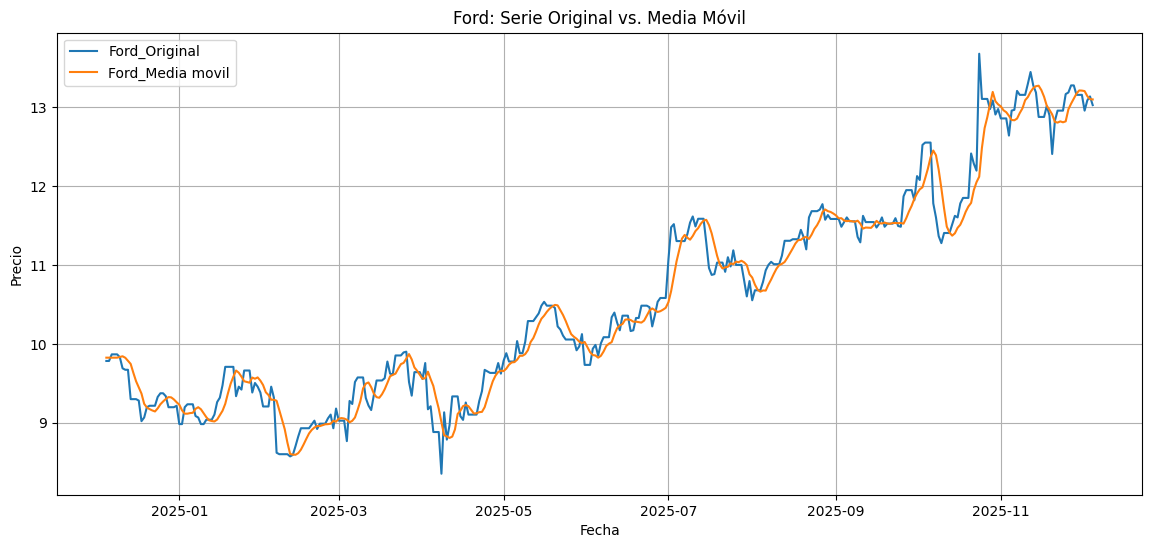

In [325]:
plt.figure(figsize=(14, 6))
sns.lineplot(x=W.index, y=W['Close']['F'], label='Ford_Original')
sns.lineplot(x=W.index, y=W[('Price', 'F')], label='Ford_Media movil')
plt.title('Ford: Serie Original vs. Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

9. Realice una matriz de gráficos donde se visualicen los diagramas de dispersión entre los valores "Close" de las Variables

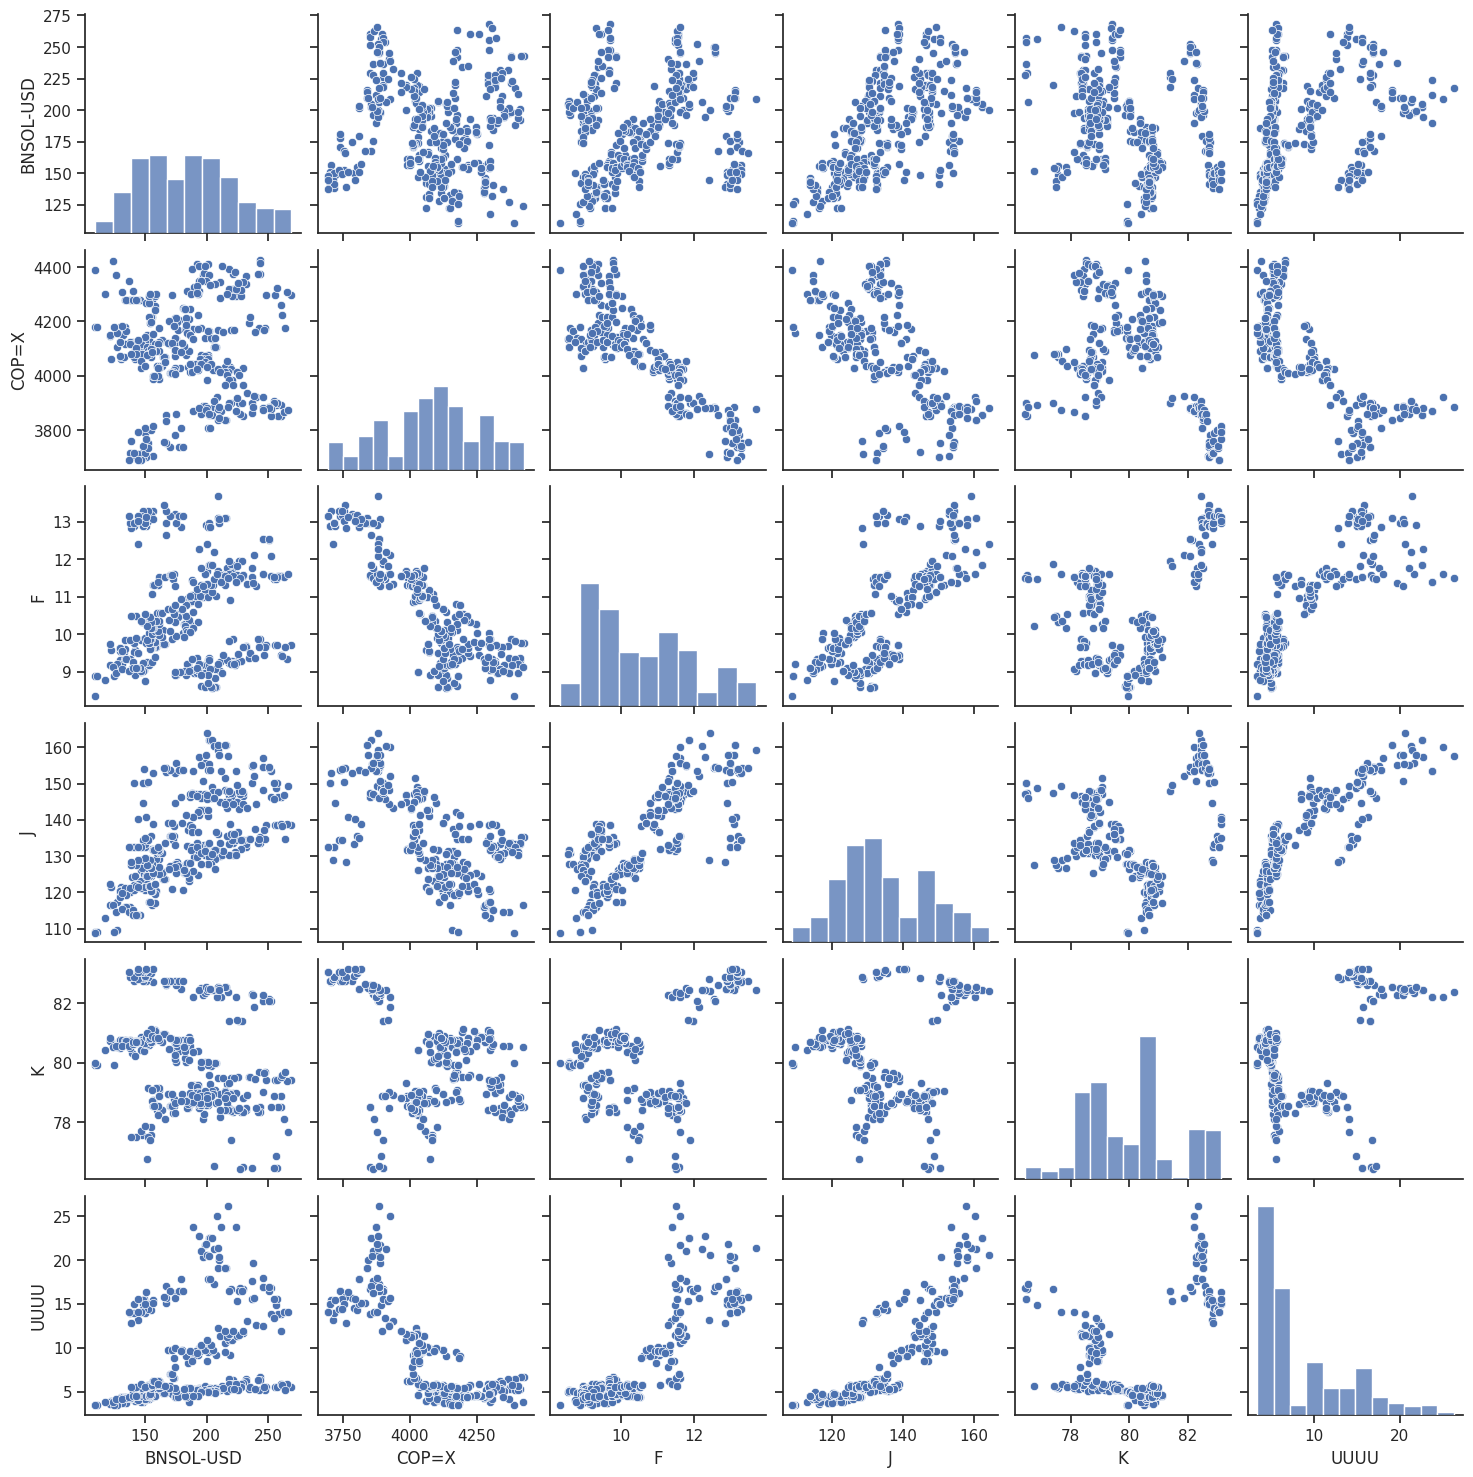

In [328]:
sns.set(style="ticks")
sns.pairplot(data["Close"])

10. Realice una regresión lineal de la criptomoneda en función de otro de los activos y calcule el ajuste del modelo.

In [338]:
X=data["Close"]['F'].values.reshape(-1,1)
y=data["Close"]['BNSOL-USD'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
linear  = LinearRegression()
linear.fit(X_train,y_train)


LinearRegression()

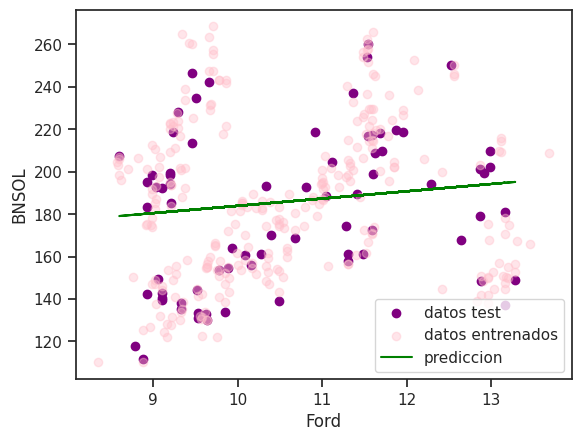

MAE:  29.974541568718095
MSE:  1230.440812258759
RMSE:  35.07763977605619
R2:  0.03974340603766391


In [339]:
yp = linear.predict(X_test)
plt.scatter(X_test, y_test,  color='PURPLE',label=r'datos test')
plt.scatter(X_train, y_train,  color='PINK',alpha=0.4,label=r'datos entrenados')
plt.plot(X_test, y_pred, color='GREEN',label=r'prediccion')
plt.legend(loc='lower right')
plt.xlabel(r'Ford')
plt.ylabel(r'BNSOL')
plt.show()

print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))